## Happy or Sad
toy problem CNN

In [1]:
import os
import zipfile
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab happy-or-sad.zip from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
zip_path = f"{getcwd()}/../tmp2/happy-or-sad.zip"
data_path = "C:/usr/tmp/h-or-s" # This is the source directory for training images

zip_ref = zipfile.ZipFile(zip_path, 'r')
zip_ref.extractall(data_path)
zip_ref.close()

In [2]:
import tensorflow as tf
DESIRED_ACCURACY = 0.999

class earlyStop(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= DESIRED_ACCURACY):
        # The Expected output: "Reached 99.9% accuracy so cancelling training!""
        print("\nReached 99.9% accuracy so cancelling training!")
        self.model.stop_training = True

callbacks = earlyStop()


In [3]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.1)

# Please use a target_size of 150 X 150.
train_generator = train_datagen.flow_from_directory(
    data_path,  
    target_size=(150, 150),
    color_mode='grayscale', 
    batch_size=8,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary',
    subset='training' )
validation_generator = train_datagen.flow_from_directory(
    data_path,  
    target_size=(150, 150),
    color_mode='grayscale', 
    batch_size=8,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary',
    subset='validation' )
# Expected output: 'Found 80 images belonging to 2 classes'


Found 72 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [8]:

# This Code Block should Define and Compile the Model. Please assume the images are 150 X 150 in your implementation.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (4,4), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Conv2D(32, (4,4), activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation='relu'),
    # binary classification task
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

# clipnorm=0.1 clipvalue=0.5
model.compile(optimizer=RMSprop(lr=0.001, decay=0.9), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 147, 147, 64)      1088      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 32)        32800     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                144020    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [9]:
# This code block should call model.fit_generator and train for
# a number of epochs.
# model fitting
history = model.fit_generator(
    train_generator,
    steps_per_epoch=9,  # x batch_size=8 = 80 images
    epochs=10,
    verbose=2,
    validation_data = validation_generator,
    validation_steps = 1,
    callbacks=[callbacks]
)

Epoch 1/10
9/9 - 1s - loss: 0.7138 - accuracy: 0.4167 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 2/10
9/9 - 1s - loss: 0.6892 - accuracy: 0.6111 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 3/10
9/9 - 1s - loss: 0.6885 - accuracy: 0.6806 - val_loss: 0.6904 - val_accuracy: 1.0000
Epoch 4/10
9/9 - 1s - loss: 0.6870 - accuracy: 0.8333 - val_loss: 0.6901 - val_accuracy: 1.0000
Epoch 5/10
9/9 - 1s - loss: 0.6863 - accuracy: 0.8056 - val_loss: 0.6898 - val_accuracy: 1.0000
Epoch 6/10
9/9 - 1s - loss: 0.6861 - accuracy: 0.9167 - val_loss: 0.6896 - val_accuracy: 1.0000
Epoch 7/10

Reached 99.9% accuracy so cancelling training!
9/9 - 1s - loss: 0.6852 - accuracy: 1.0000 - val_loss: 0.6895 - val_accuracy: 1.0000


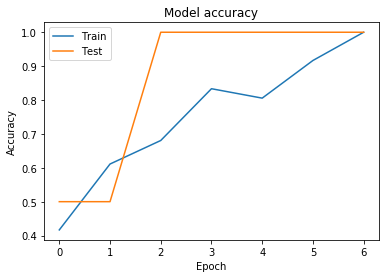

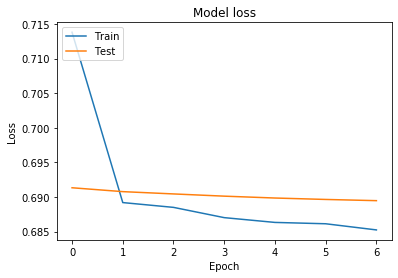

In [11]:
from keras_util import plot_history

plot_history(history)
